In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore




In [7]:
df = pd.read_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [8]:
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [9]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [10]:

missing = df.isna().mean() * 100
missing[missing > 5]

Comments    100.0
dtype: float64

In [11]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)

# Flag outliers
outliers = (z_scores.abs() > 3)
print(outliers.sum())

# Handle missing values
df[columns_to_check] = df[columns_to_check].fillna(df[columns_to_check].median())


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


In [19]:
df.to_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\benin-malanville.csv', index=False)


Text(0.5, 1.0, 'Time Series: GHI, DNI, DHI, Tamb')

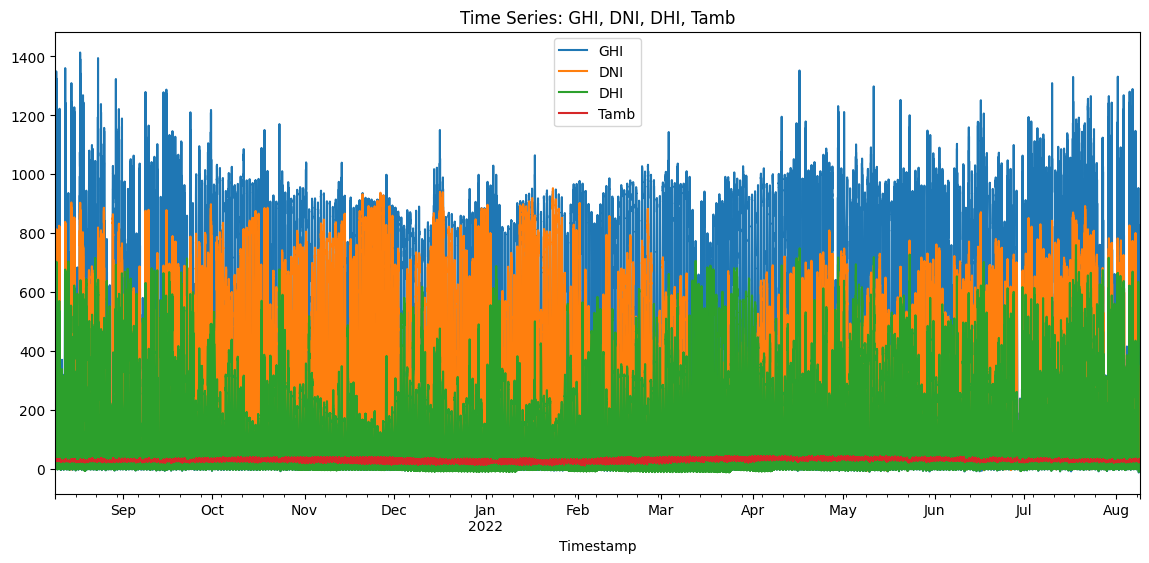

In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14,6))
plt.title("Time Series: GHI, DNI, DHI, Tamb")
# plt.show()


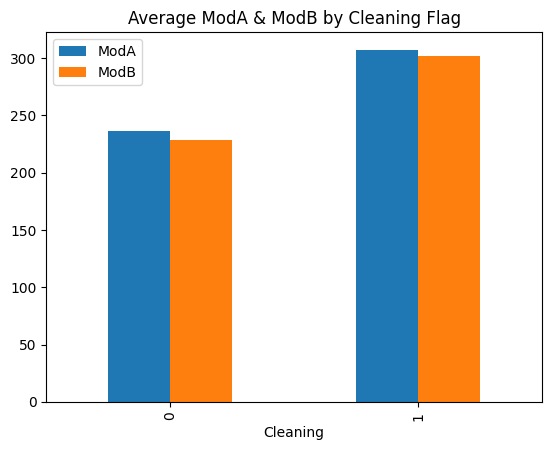

In [21]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average ModA & ModB by Cleaning Flag")
plt.show()


<Axes: >

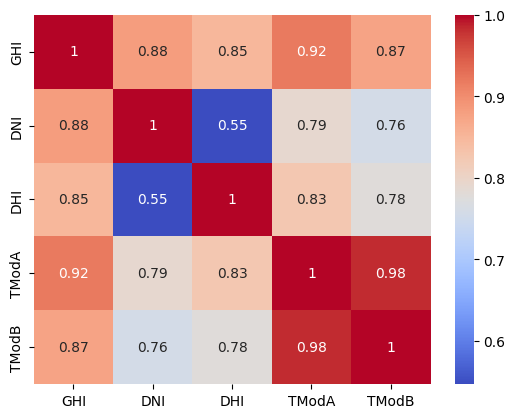

In [22]:
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='WS', ylabel='GHI'>

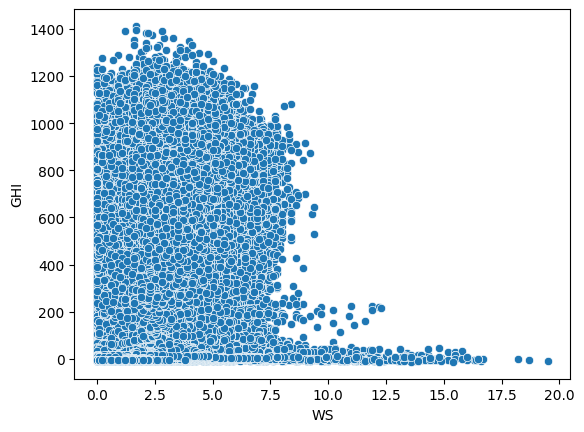

In [23]:
sns.scatterplot(x='WS', y='GHI', data=df)


<Axes: xlabel='RH', ylabel='Tamb'>

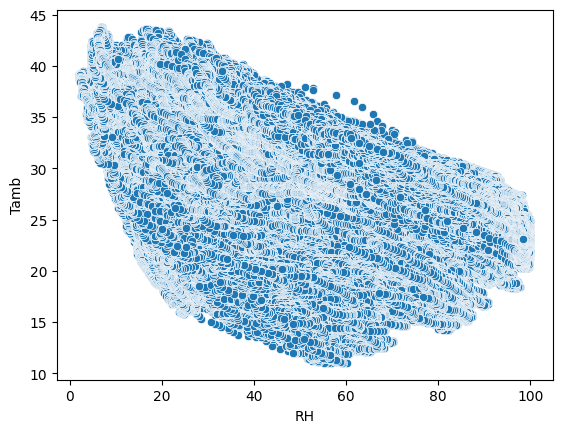

In [24]:
sns.scatterplot(x='RH', y='Tamb', data=df)

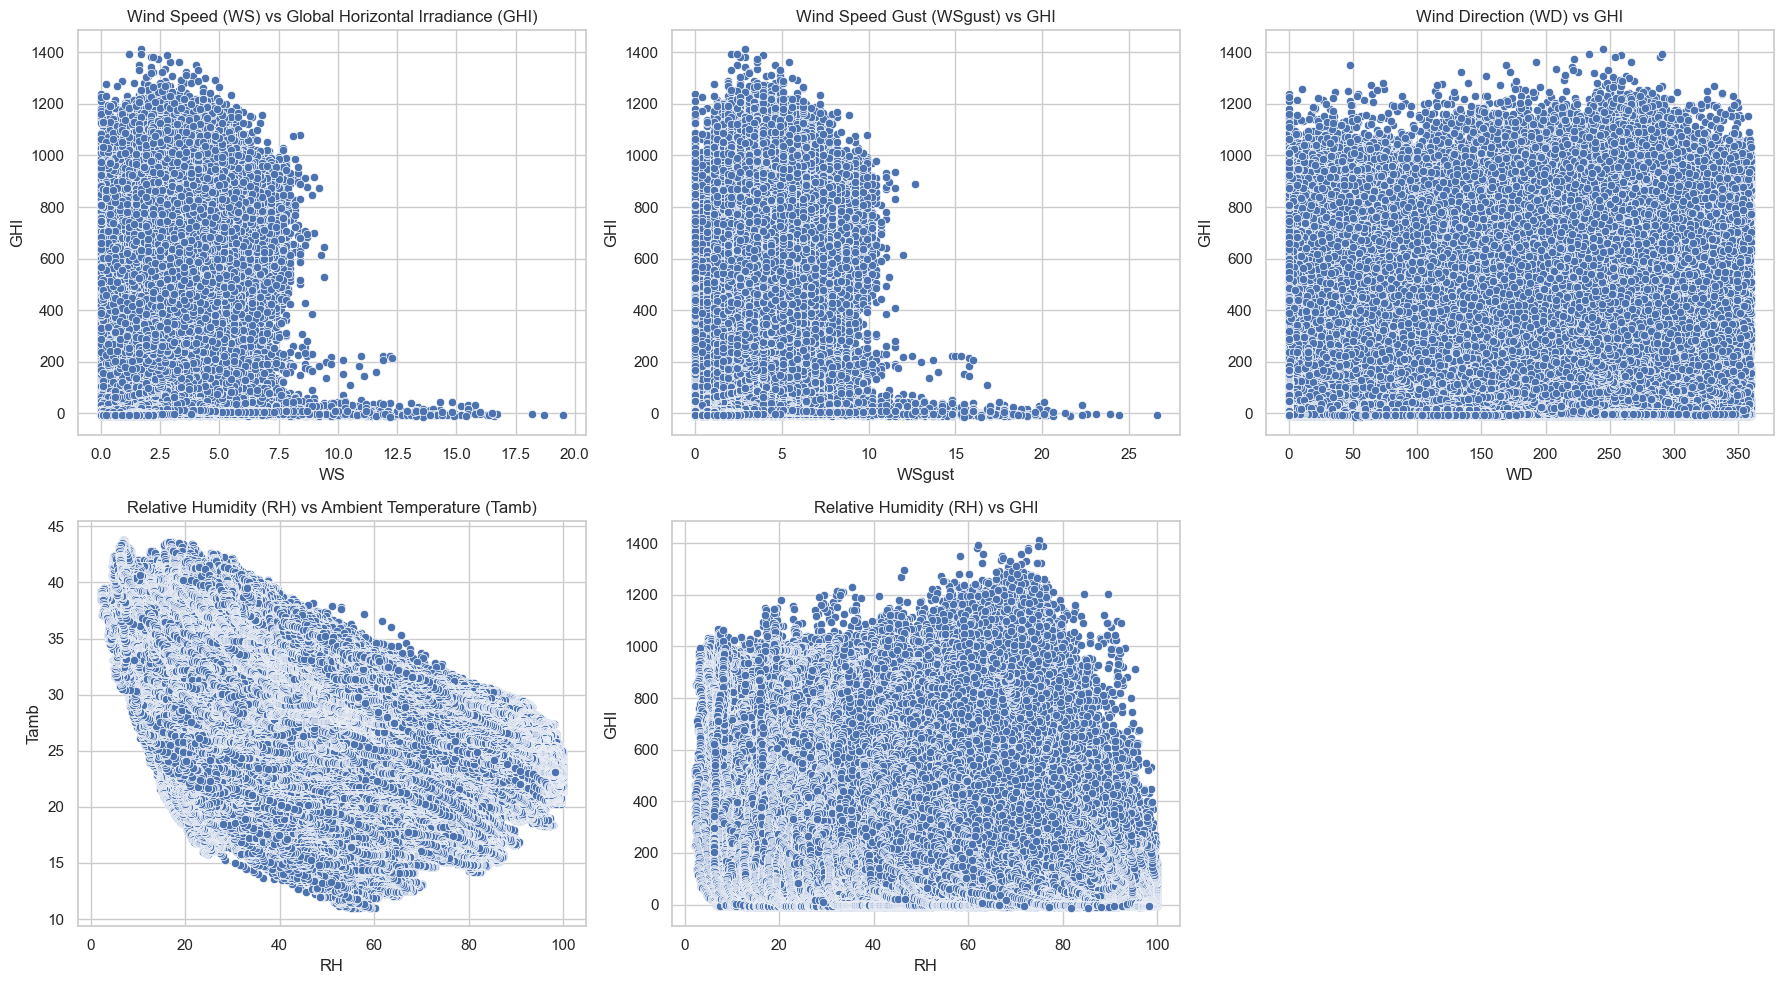

In [25]:
# Set style
sns.set(style="whitegrid")

# Create scatter plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# WS vs GHI
sns.scatterplot(x='WS', y='GHI', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Wind Speed (WS) vs Global Horizontal Irradiance (GHI)')

# WSgust vs GHI
sns.scatterplot(x='WSgust', y='GHI', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Wind Speed Gust (WSgust) vs GHI')

# WD vs GHI
sns.scatterplot(x='WD', y='GHI', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Wind Direction (WD) vs GHI')

# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity (RH) vs GHI')

# Hide last subplot (empty)
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


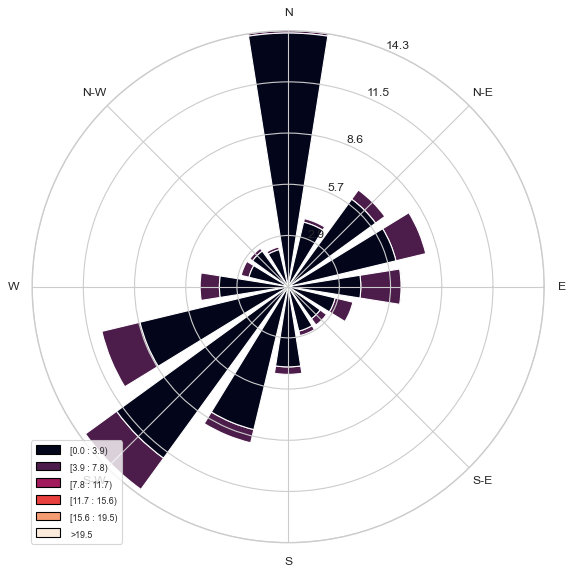

In [26]:
!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


Text(0, 0.5, 'Frequency')

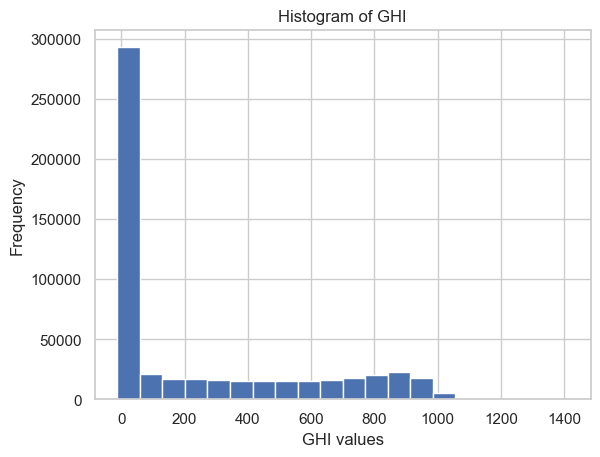

In [27]:
df['GHI'].hist(bins=20)
plt.title('Histogram of GHI') # Add a title
plt.xlabel('GHI values') # Add x-axis label
plt.ylabel('Frequency') # Add y-axis label


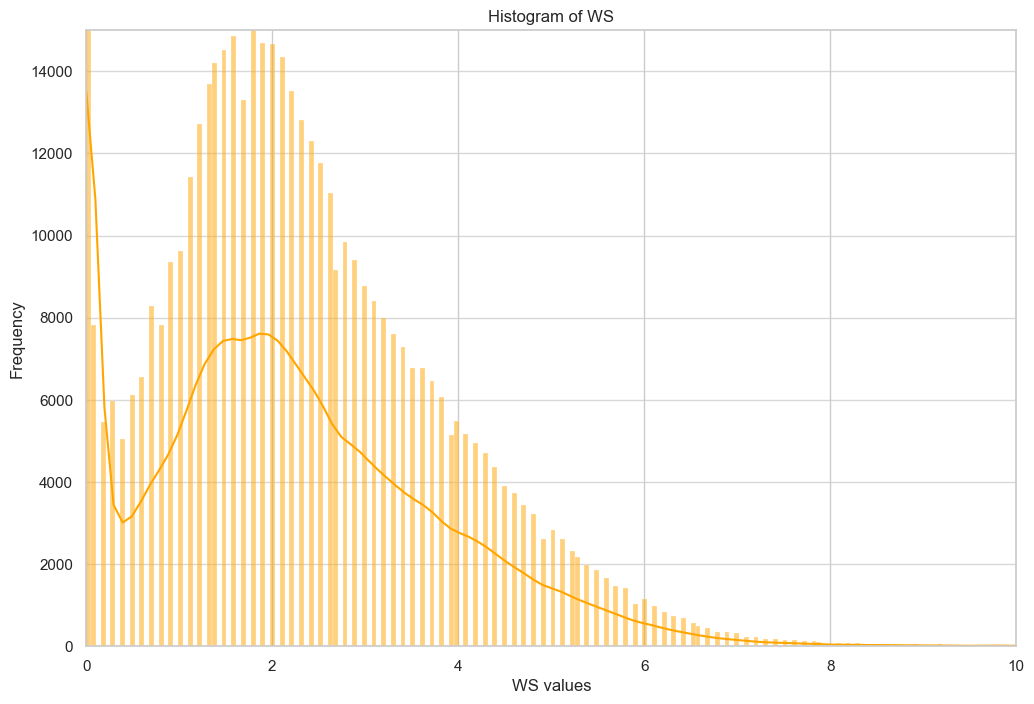

In [28]:
plt.figure(figsize=(12, 8)) 
sns.histplot(data=df, x='WS', kde=True, color='orange') # Histogram for WS, using a different color
plt.title('Histogram of WS') # Add a title
plt.xlabel('WS values') # Add x-axis label
plt.xlim(0, 10)
plt.ylabel('Frequency') # Add y-axis label
plt.ylim(0,15000)
plt.grid(axis='y', alpha=0.75) # Add a grid
plt.show() 

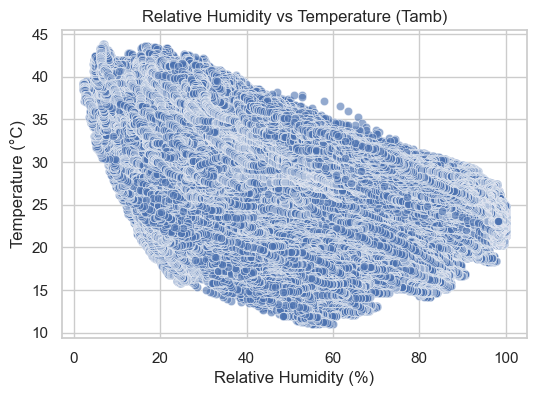

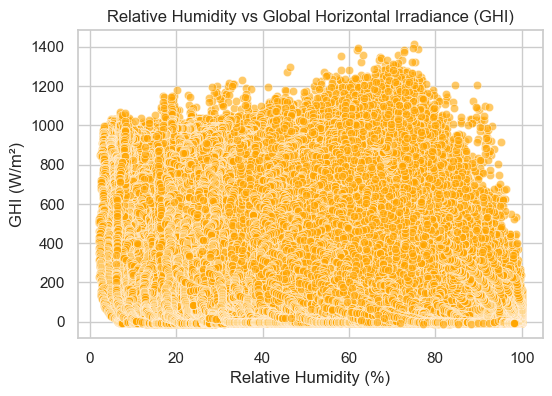

In [29]:

sns.set(style="whitegrid")

# RH vs Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.6)
plt.title('Relative Humidity vs Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

# RH vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.6, color='orange')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()


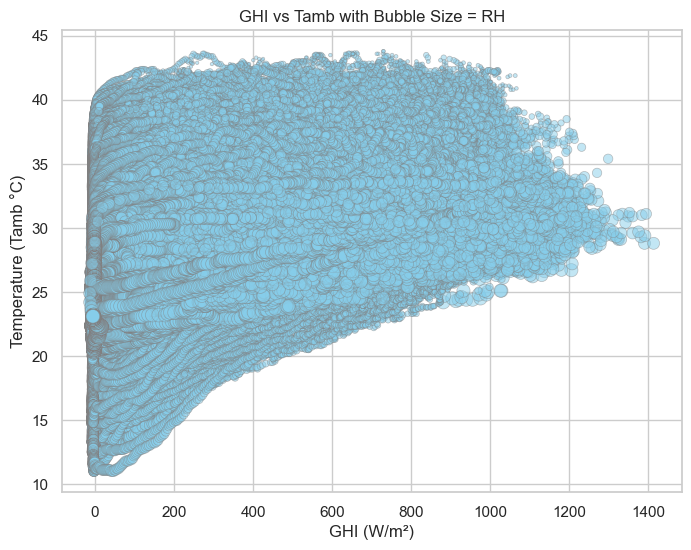

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='skyblue', edgecolors='grey', linewidth=0.5)
plt.title('GHI vs Tamb with Bubble Size = RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (Tamb °C)')
plt.grid(True)
plt.show()


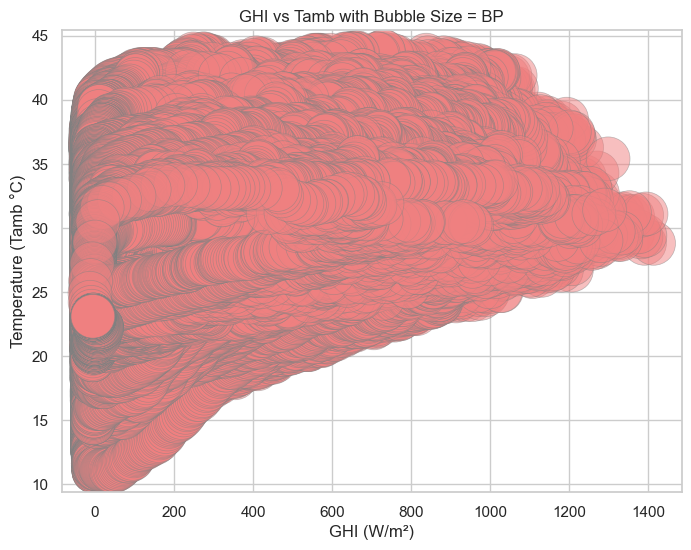

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['BP'], alpha=0.5, c='lightcoral', edgecolors='grey', linewidth=0.5)
plt.title('GHI vs Tamb with Bubble Size = BP')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (Tamb °C)')
plt.grid(True)
plt.show()
